Космический корабль "ГИГАНТУМ" был межзвездным пассажирским лайнером, запущенным месяц назад. Почти 13 000 пассажиров на борту новейшего звезного корабля отправилось в путь. Корабль перевозил колонистов из нашей Солнечной системы в три недавно открытые обитаемые экзопланеты, вращающиеся вокруг близлежащих звезд.

По дороге к Альфе Центавра, на пути к своему первому месту назначения - планете 55 Cancri E - космический корабль столкнулся с пространственно-временной аномалией, скрытой в облаке пыли.

Хотя корабль остался нетронутым, почти половина пассажиров отправилась в альтернативное измерение! Предскажите судьбу пассажиров!

Данные в столбцах:

- `PassengerId` - уникальный идентификатор для каждого пассажира. Каждый идентификатор имеет форму gggg_pp, где gggg указывает группу, с которой путешествует пассажир, а pp - их номер в группе. Люди в группе часто являются членами семьи, но не всегда.
- `HomePlanet` - планета, с которой отбыл пассажир, обычно планета его постоянного проживания.
- `CryoSleep` - Указывает, решил ли пассажир погрузиться в анабиоз на время полета. Пассажиры, находящиеся в криосоне, заперты в своих каютах.
- `Cabin` - номер каюты, в которой находится пассажир. Принимает форму палуба/номер/борт, где борт может быть либо P для левого борта, либо S для правого борта.
- `Destination` - планета, на которую пассажир будет высаживаться.
- `Age` - Возраст пассажира.
- `VIP` - Оплатил ли пассажир специальное VIP-обслуживание во время рейса.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Сумма, которую пассажир выставил за каждое из многочисленных роскошных удобств космического корабля. 
- `Name` - имя и фамилия пассажира.
- `Transported` - был ли пассажир перенесен в другое измерение. Это целевая переменная, столбец, который вы пытаетесь предсказать.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.__version__ # в версии 0.13 варинги исправлены  conda install seaborn -c conda-forge

'0.13.2'

In [2]:
space_ship = pd.read_csv('datasets/spaceship.csv')
space_ship.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,4324_04,Mars,True,F/810/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Trion Brie,True
1,7598_01,Earth,True,G/1231/S,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,Danie Ingston,True
2,9129_01,Earth,False,G/1485/P,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,Hardy Graneyes,False


In [3]:
space_ship.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,5958.000000,5961.000000,5954.000000,5942.000000,5961.000000,5948.000000
mean,28.906009,227.604932,464.813571,167.549310,302.924174,302.396604
std,14.665376,690.968851,1625.092899,614.864305,1117.163838,1113.662590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,82.750000,24.000000,59.000000,44.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,20336.000000


In [4]:
space_ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6085 non-null   object 
 1   HomePlanet    5948 non-null   object 
 2   CryoSleep     5929 non-null   object 
 3   Cabin         5946 non-null   object 
 4   Destination   5960 non-null   object 
 5   Age           5958 non-null   float64
 6   VIP           5938 non-null   object 
 7   RoomService   5961 non-null   float64
 8   FoodCourt     5954 non-null   float64
 9   ShoppingMall  5942 non-null   float64
 10  Spa           5961 non-null   float64
 11  VRDeck        5948 non-null   float64
 12  Name          5956 non-null   object 
 13  Transported   6085 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 624.1+ KB


In [5]:
space_ship.isna().sum()

PassengerId       0
HomePlanet      137
CryoSleep       156
Cabin           139
Destination     125
Age             127
VIP             147
RoomService     124
FoodCourt       131
ShoppingMall    143
Spa             124
VRDeck          137
Name            129
Transported       0
dtype: int64

In [6]:
def pct_missing(df):
    na_cols = df.columns[df.isna().any()].tolist()
    mv=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
    return mv
    
pct_missing(space_ship)

,Number_missing,Percentage_missing
HomePlanet,137,2.25
CryoSleep,156,2.56
Cabin,139,2.28
Destination,125,2.05
Age,127,2.09
VIP,147,2.42
RoomService,124,2.04
FoodCourt,131,2.15
ShoppingMall,143,2.35
Spa,124,2.04


In [7]:
def pct_dublicate(df):
    return print("Дубликатов в датафрейме : ",df.duplicated().sum(), 
                 "    процент : ",np.round(100*df.duplicated().sum()/len(df),1),"%")
                
pct_dublicate(space_ship)

Дубликатов в датафрейме :  0     процент :  0.0 %


In [8]:
space_ship.nunique()

PassengerId     6085
HomePlanet         3
CryoSleep          2
Cabin           4862
Destination        3
Age               80
VIP                2
RoomService     1016
FoodCourt       1210
ShoppingMall     889
Spa             1058
VRDeck          1044
Name            5949
Transported        2
dtype: int64

In [9]:
space_ship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

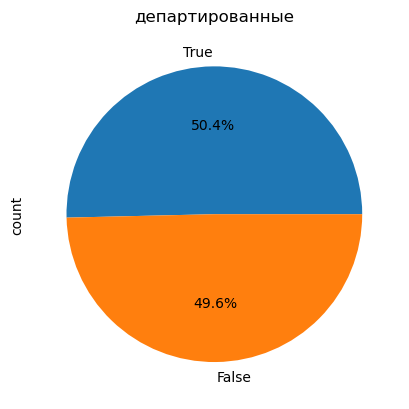

In [10]:
space_ship['Transported'].value_counts().plot.pie( 
            autopct='%1.1f%%',  textprops={'fontsize':10}).set_title("департированные");

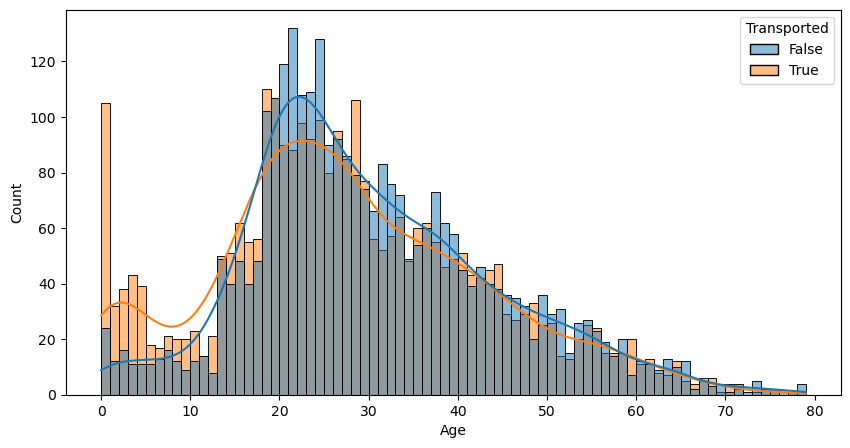

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=space_ship, x='Age', hue='Transported', binwidth=1, kde=True);

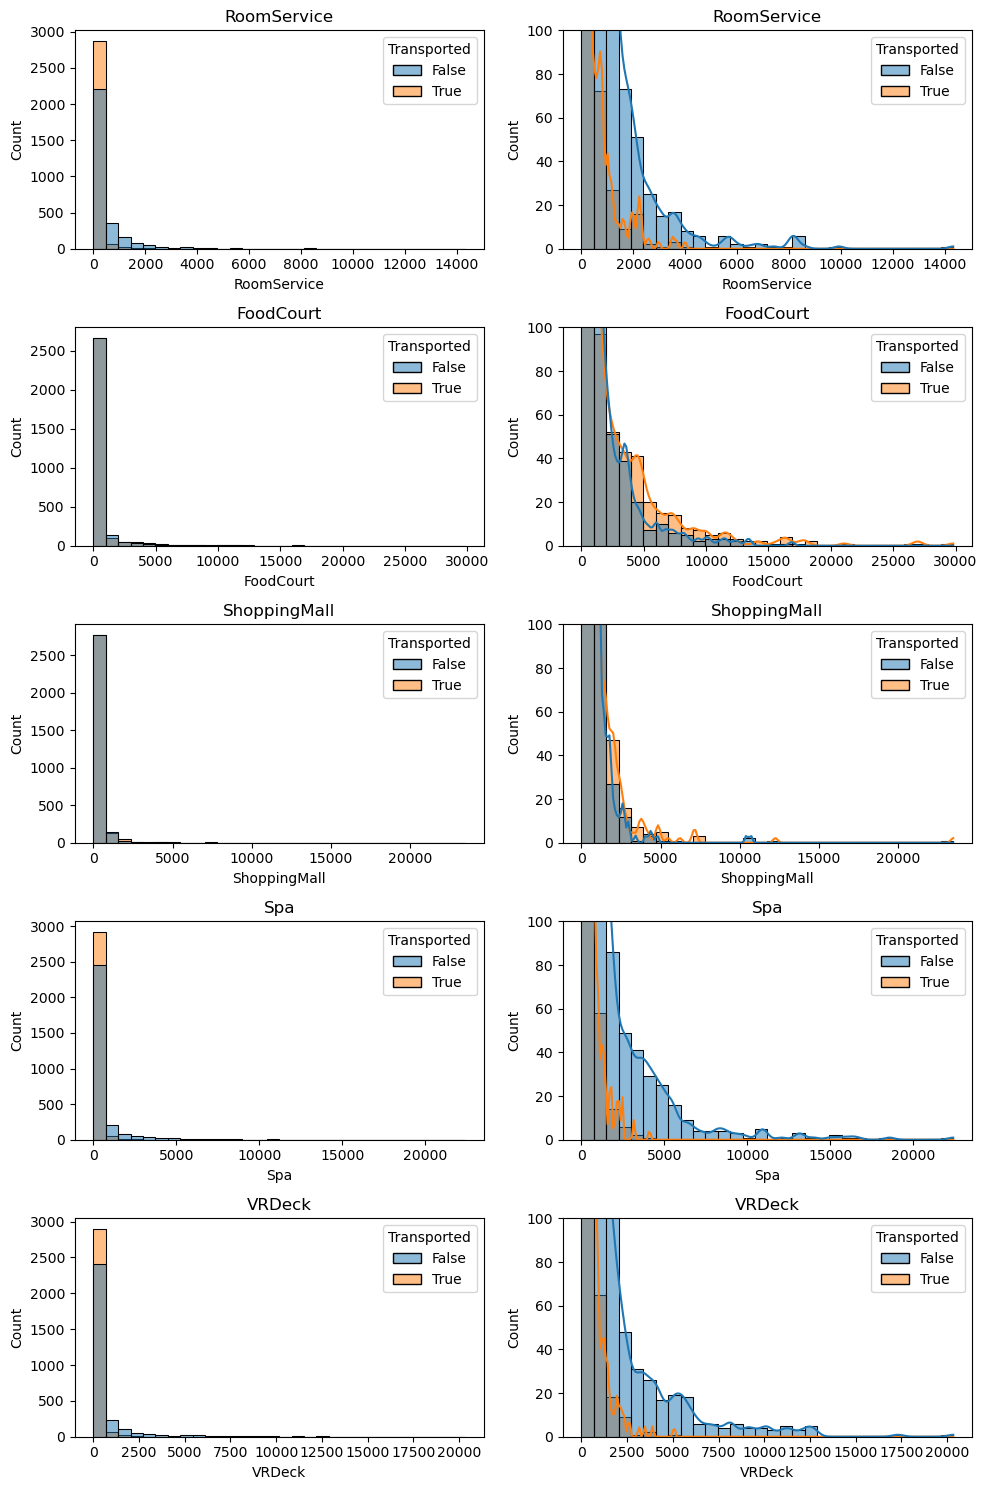

In [12]:

money_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,15))
for i, feature in enumerate(money_features):
    # левая часть
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data = space_ship, x = feature, axes = ax, bins = 30, kde = False, hue='Transported')
    ax.set_title(feature)
    
    # правая часть
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data = space_ship, x = feature, axes = ax, bins = 30, kde = True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(feature)
fig.tight_layout()  
plt.show()

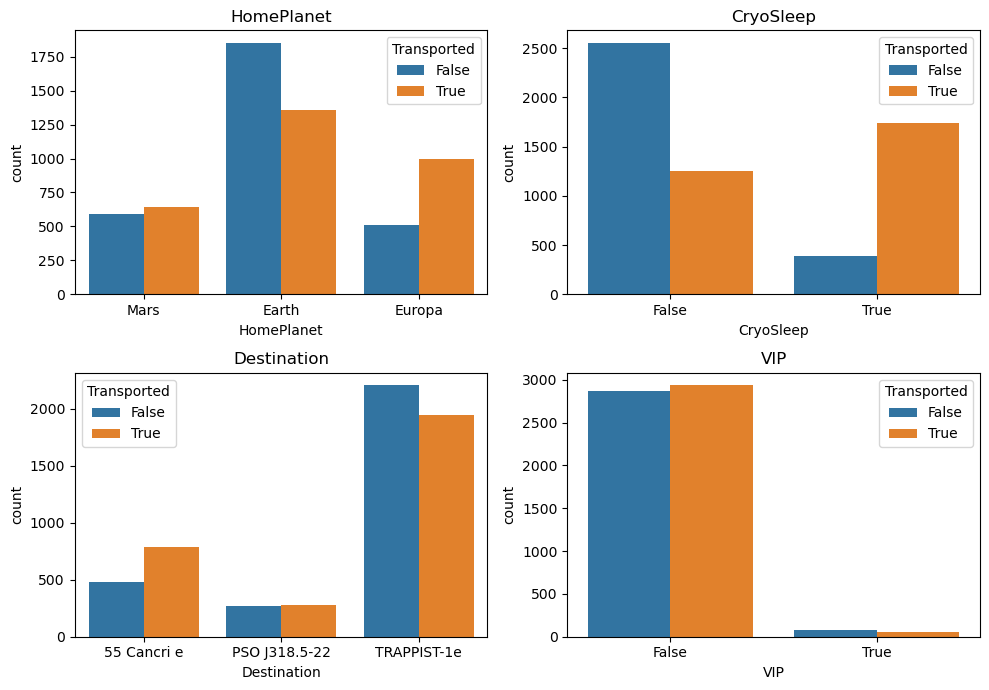

In [13]:
cat_features=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,7))
for i, feature in enumerate(cat_features):
    ax=fig.add_subplot(2, 2,i+1)
    sns.countplot(data=space_ship, x=feature, axes=ax, hue='Transported')
    ax.set_title(feature)
fig.tight_layout() 
plt.show()

(0.0, 100.0)

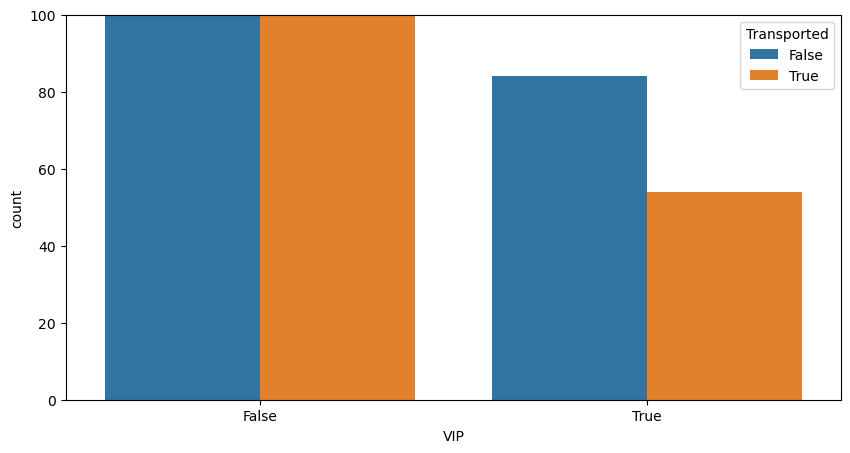

In [14]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=space_ship, x='VIP', hue='Transported')
plt.ylim([0,100])

In [15]:
#space_ship["Cabin"] = space_ship["Cabin"].fillna('Z/9999/Z')
space_ship[["Cabin_deck", "Cabin_number", "Cabin_side"]] = space_ship["Cabin"].str.split("/", expand=True)
space_ship.Cabin_number = space_ship.Cabin_number.astype(float)# int
space_ship.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side
0,4324_04,Mars,True,F/810/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Trion Brie,True,F,810.0,S
1,7598_01,Earth,True,G/1231/S,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,Danie Ingston,True,G,1231.0,S
2,9129_01,Earth,False,G/1485/P,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,Hardy Graneyes,False,G,1485.0,P


In [16]:
space_ship[['Group', 'Group_in_num']] = space_ship["PassengerId"].str.split("_", expand=True)
space_ship[['Group', 'Group_in_num']] = space_ship[['Group', 'Group_in_num']].astype(int)
space_ship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,Group,Group_in_num
0,4324_04,Mars,True,F/810/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Trion Brie,True,F,810.0,S,4324,4
1,7598_01,Earth,True,G/1231/S,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,Danie Ingston,True,G,1231.0,S,7598,1
2,9129_01,Earth,False,G/1485/P,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,Hardy Graneyes,False,G,1485.0,P,9129,1
3,2449_02,Mars,True,E/146/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Tark Nacke,False,E,146.0,P,2449,2
4,4251_01,Earth,False,F/879/P,TRAPPIST-1e,29.0,False,715.0,0.0,NaN,698.0,106.0,Dorice Connelson,False,F,879.0,P,4251,1


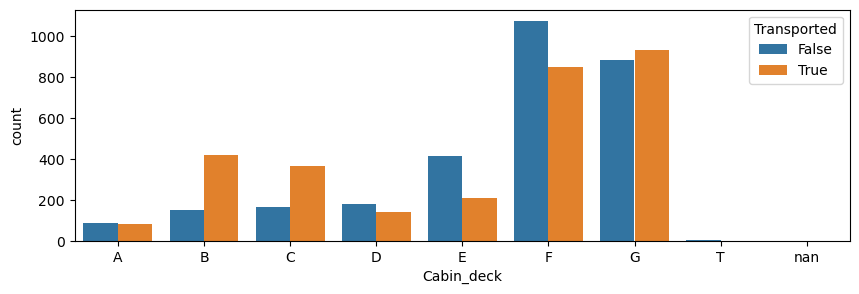

In [17]:
sort_deck = space_ship.Cabin_deck.sort_values().unique()

fig=plt.figure(figsize=(10,3))
sns.countplot(data=space_ship, x='Cabin_deck', hue='Transported', order = sort_deck);

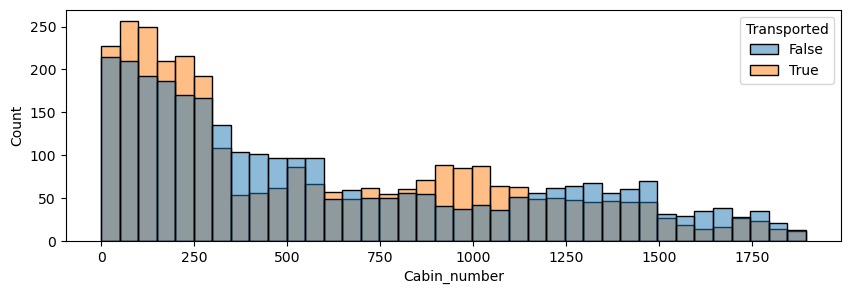

In [18]:
fig=plt.figure(figsize=(10,3))
sns.histplot(data=space_ship, x='Cabin_number', hue='Transported',binwidth=50);

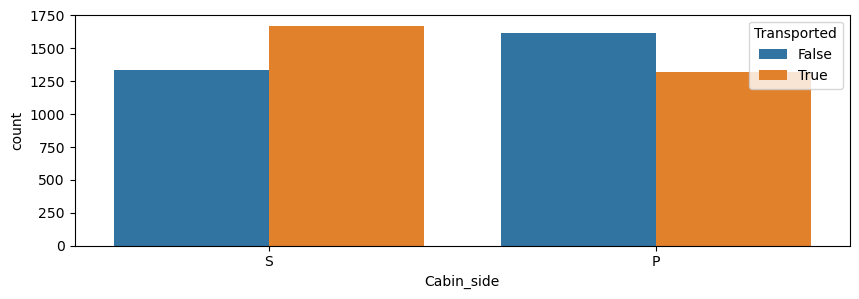

In [19]:
fig=plt.figure(figsize=(10,3))
sns.countplot(data=space_ship, x='Cabin_side', hue='Transported');